In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycountry_convert as pc
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
% matplotlib inline

# 1. Gather

In [2]:
# reading source data from csv files
df2015 = pd.read_csv('data/2015.csv', header=1)
df2016 = pd.read_csv('data/2016.csv')
df2017 = pd.read_csv('data/2017.csv')
df2018 = pd.read_csv('data/2018.csv')
df2019 = pd.read_csv('data/2019.csv')

# 2. Assess

In [66]:
print('shape of 2015:', df2015.shape)
print('shape of 2016:', df2016.shape)
print('shape of 2017:', df2017.shape)
print('shape of 2018:', df2018.shape)
print('shape of 2019:', df2019.shape)

shape of 2015: (26086, 223)
shape of 2016: (56030, 67)
shape of 2017: (51392, 155)
shape of 2018: (98855, 130)
shape of 2019: (88883, 86)


In [79]:
df2016.isnull().mean().sort_values()

Unnamed: 0                          0.000000
continent                           0.000000
collector                           0.000000
age_range                           0.005408
gender                              0.007924
country                             0.008959
so_region                           0.011422
age_midpoint                        0.012386
un_subregion                        0.012797
self_identification                 0.032625
employment_status                   0.115188
experience_midpoint                 0.116188
experience_range                    0.116188
occupation                          0.116206
aliens                              0.122309
tech_do                             0.125022
big_mac_index                       0.128592
tech_want                           0.144173
programming_ability                 0.161485
occupation_group                    0.162342
hobby                               0.167000
unit_testing                        0.167285
commit_fre

In [82]:
df2017.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [85]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56030 entries, 0 to 56029
Data columns (total 67 columns):
Unnamed: 0                          56030 non-null int64
collector                           56030 non-null object
country                             55528 non-null object
un_subregion                        55313 non-null object
so_region                           55390 non-null object
age_range                           55727 non-null object
age_midpoint                        55336 non-null float64
gender                              55586 non-null object
self_identification                 54202 non-null object
occupation                          49519 non-null object
occupation_group                    46934 non-null object
experience_range                    49520 non-null object
experience_midpoint                 49520 non-null float64
salary_range                        46121 non-null object
salary_midpoint                     41742 non-null float64
big_mac_index      

In [88]:
df2019.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,continent
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,Europe
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,Europe
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult,Asia


# 3. Clean

In [3]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
def country2continent(country):
    '''
    convert country name to continent name
    e.g. input 'USA'  ouput 'North America'
    '''
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = continents[continent_code]
    except:
        continent_name = 'not find'
    return continent_name

In [4]:
def compensation2int(compensation):
    '''
    data type convertion from 'object' to 'float'
    '''
    try:
        res = float(compensation)
    except:
        res = np.nan
    return res

### 3.1 Clean data for year 2015

In [ ]:
# create a new column 'continent' based on 'Country'
df2015['continent'] = df2015['Country'].apply(country2continent)
# Convert the datatype of Compensation from object to float
df2015['Compensation: midpoint']=df2015['Compensation: midpoint'].apply(compensation2int)
# delete rows if Compensation column is np.nan
df2015_remove_nan = df2015.dropna(subset=['Compensation: midpoint'],axis = 0)

### 3.2 Clean data for year 2016

In [ ]:
# create a new column 'continent' based on 'Country'
df2016['continent'] = df2016['country'].apply(country2continent)
# delete rows if salary column is np.nan
df2016_remove_nan = df2016.dropna(subset=['salary_midpoint'],axis = 0)

### 3.3 Clean data for year 2017

In [ ]:
# create a new column 'continent' based on 'Country'
df2017['continent'] = df2017['Country'].apply(country2continent)
# delete rows if salary column is np.nan
df2017_remove_nan = df2017.dropna(subset=['Salary'],axis = 0)

### 3.4 Clean data for year 2018

In [ ]:

df2018['continent'] = df2018['Country'].apply(country2continent)
# delete rows if salary column is np.nan
df2018_remove_nan = df2018.dropna(subset=['ConvertedSalary'], axis=0)

### 3.5 Clean data for year 2019

In [ ]:
# create a new column 'continent' based on 'Country'
df2019['continent'] = df2019['Country'].apply(country2continent)
# delete rows if salary column is np.nan
df2019_remove_nan = df2019.dropna(subset=['ConvertedComp'], axis=0)

# 4. Analyze and model

### 4.1 Average salary calculation

**4.1.1 Year 2015**

In [6]:
# only considering full time developers
temp = df2015_remove_nan[df2015_remove_nan['Employment Status']=='Employed full-time']
# get the 0.1 and 0.9 quantile of salary
low = temp['Compensation: midpoint'].quantile(0.1)
high = temp['Compensation: midpoint'].quantile(0.9)
# only use the salary that is within the range between 0.1 and 0.9 quantile
temp = temp[temp['Compensation: midpoint']>=low]
temp = temp[temp['Compensation: midpoint']<=high]
df_salary_2015 = temp.groupby(['continent']).mean()['Compensation: midpoint']

**4.1.2 Year 2016**

In [ ]:
# only considering full time developers
temp = df2016_remove_nan[df2016_remove_nan['employment_status']=='Employed full-time']
# get the 0.1 and 0.9 quantile of salary
low = temp['salary_midpoint'].quantile(0.1)
high = temp['salary_midpoint'].quantile(0.9)
# only use the salary that is within the range between 0.1 and 0.9 quantile
temp = temp[temp['salary_midpoint']>=low]
temp = temp[temp['salary_midpoint']<=high]
df_salary_2016 = temp.groupby(['continent']).mean()['salary_midpoint']

**4.1.3 Year 2017**

In [ ]:
# only considering full time developers
temp = df2017_remove_nan[df2017_remove_nan['EmploymentStatus']=='Employed full-time']
# get the 0.1 and 0.9 quantile of salary
low = temp['Salary'].quantile(0.1)
high = temp['Salary'].quantile(0.9)
temp = temp[temp['Salary']>=low]
temp = temp[temp['Salary']<=high]
# only use the salary that is within the range between 0.1 and 0.9 quantile
df_salary_2017 = temp.groupby(['continent']).mean()['Salary']

**4.1.4 Year 2018**

In [ ]:
# only considering full time developers
temp = df2018_remove_nan[df2018_remove_nan['Employment']=='Employed full-time']
# get the 0.1 and 0.9 quantile of salary
low = temp['ConvertedSalary'].quantile(0.1)
high = temp['ConvertedSalary'].quantile(0.9)
# only use the salary that is within the range between 0.1 and 0.9 quantile
temp = temp[temp['ConvertedSalary']>=low]
temp = temp[temp['ConvertedSalary']<=high]
df_salary_2018 = temp.groupby(['continent']).mean()['ConvertedSalary']

**4.1.5 Year 2019**

In [ ]:
temp = df2019_remove_nan[df2019_remove_nan['Employment']=='Employed full-time']
low = temp['ConvertedComp'].quantile(0.1)
high = temp['ConvertedComp'].quantile(0.9)
print(low, high)
temp = temp[temp['ConvertedComp']>=low]
temp = temp[temp['ConvertedComp']<=high]
df_salary_2019 = temp.groupby(['continent']).mean()['ConvertedComp']

### 4.2 Most popular programming languages

**4.2.1 Year 2015**

In [ ]:
# get the columns related to the programming languages
column = [x for x in df2015.columns if x.startswith('Current Lang & Tech')]
df2015[column].isnull().mean().sort_values()[0:10]

**4.2.2 Year 2016**

In [ ]:
all_languages = []
for x in list(df2016['tech_do'].dropna()):
    items = x.split(';')
    for item in items:
        all_languages.append(item.strip())
all_languages_count =Counter(all_languages)
all_languages_count.most_common(10)

**4.2.3 Year 2017**

In [ ]:
all_languages = []
for x in list(df2017['HaveWorkedLanguage'].dropna()):
    items = x.split(';')
    for item in items:
        all_languages.append(item.strip())
all_languages_count =Counter(all_languages)
all_languages_count.most_common(10)

**4.2.4 Year 2018**

In [ ]:
all_languages = []
for x in list(df2018['LanguageWorkedWith'].dropna()):
    items = x.split(';')
    for item in items:
        all_languages.append(item.strip())
all_languages_count =Counter(all_languages)
all_languages_count.most_common(10)

**4.2.5 Year 2019**

In [ ]:
all_languages = []
for x in list(df2019['LanguageWorkedWith'].dropna()):
    items = x.split(';')
    for item in items:
        all_languages.append(item.strip())
all_languages_count =Counter(all_languages)
all_languages_count.most_common(10)

### 4.3 Most popular IDEs

**4.3.1 Year 2016**

In [ ]:
all_editor = []
for x in list(df2016['dev_environment'].dropna()):
    items = x.split(';')
    for item in items:
        all_editor.append(item.strip())
all_editor_count =Counter(all_editor)
all_editor_count.most_common(10)

**4.3.2 Year 2017**

In [ ]:
all_editor = []
for x in list(df2017['IDE'].dropna()):
    items = x.split(';')
    for item in items:
        all_editor.append(item.strip())
all_editor_count =Counter(all_editor)
all_editor_count.most_common(10)

**4.3.3 Year 2018**

In [ ]:
all_editor = []
for x in list(df2018['IDE'].dropna()):
    items = x.split(';')
    for item in items:
        all_editor.append(item.strip())
all_editor_count =Counter(all_editor)
all_editor_count.most_common(10)

**4.3.4 Year 2019**

In [ ]:
all_editor = []
for x in list(df2019['DevEnviron'].dropna()):
    items = x.split(';')
    for item in items:
        all_editor.append(item.strip())
all_editor_count =Counter(all_editor)
all_editor_count.most_common(10)

*5.3 Most popular IDEs for year 2019*

[('Visual Studio Code', 44311),
 ('Visual Studio', 27490),
 ('Notepad++', 26621),
 ('IntelliJ', 22166),
 ('Vim', 22163),
 ('Sublime Text', 20424),
 ('Android Studio', 14787),
 ('Eclipse', 12591),
 ('PyCharm', 11724),
 ('Atom', 11636)]

# 5. Visualize

### 5.1 Figure 1. Average salary of full time professional developers

In [24]:
df_salary_2015.name = '2015'
df_salary_2016.name = '2016'
df_salary_2017.name = '2017'
df_salary_2018.name = '2018'
df_salary_2019.name = '2019'

In [25]:
df_salary = pd.DataFrame([df_salary_2015,df_salary_2016,df_salary_2017,df_salary_2018,df_salary_2019])
df_salary = df_salary/1000

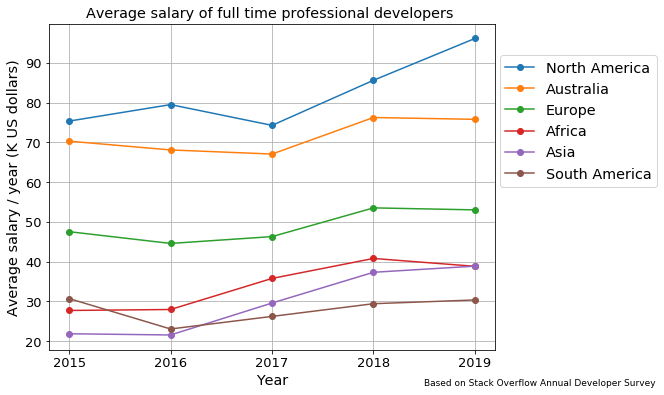

In [62]:
plt.figure(figsize=(8,6))
plt.title('Average salary of full time professional developers ',fontsize='x-large')
plt.xlabel("Year",fontsize='x-large')
plt.ylabel("Average salary / year (K US dollars)",fontsize='x-large')
plt.plot(df_salary['North America'],'-o',label='North America')
plt.plot(df_salary['Australia'],'-o',label='Australia')
plt.plot(df_salary['Europe'],'-o',label='Europe')
plt.plot(df_salary['Africa'],'-o',label='Africa')
plt.plot(df_salary['Asia'],'-o',label='Asia')
plt.plot(df_salary['South America'],'-o',label='South America')
plt.grid('on')
plt.tick_params(labelsize=13)
lg=plt.legend(loc=[1.01, 0.5],fontsize='x-large')
plt.text(3.5,9,'Based on Stack Overflow Annual Developer Survey',fontsize=9)
plt.savefig('salary_increase.png',dpi=300, bbox_extra_artists=(lg,),bbox_inches='tight')
plt.show()

### 5.2 Figure 2. The salary increase starting from Year 2015 in percent %

In [27]:
# get the salary increase percentage using Year 2015 as the baseline
df_salary_percentage=(df_salary/df_salary.iloc[0,:]-1)*100

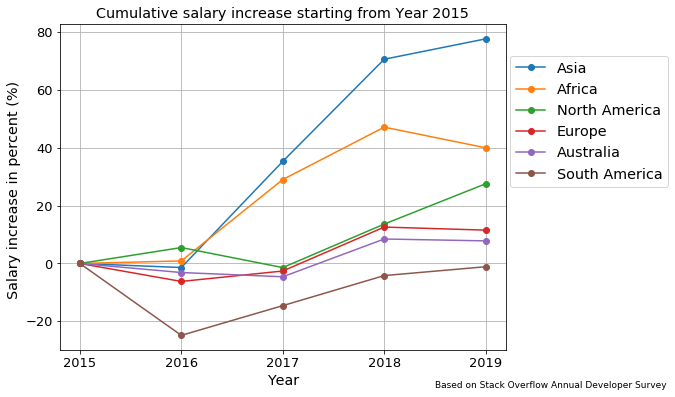

In [63]:
plt.figure(figsize=(8,6))
plt.title('Cumulative salary increase starting from Year 2015',fontsize='x-large')
plt.xlabel("Year",fontsize='x-large')
plt.ylabel("Salary increase in percent (%) ",fontsize='x-large')
plt.plot(df_salary_percentage['Asia'],'-o',label='Asia')
plt.plot(df_salary_percentage['Africa'],'-o',label='Africa')
plt.plot(df_salary_percentage['North America'],'-o',label='North America')
plt.plot(df_salary_percentage['Europe'],'-o',label='Europe')
plt.plot(df_salary_percentage['Australia'],'-o',label='Australia')
plt.plot(df_salary_percentage['South America'],'-o',label='South America')
plt.grid('on')
plt.tick_params(labelsize=13)
plt.text(3.5,-43,'Based on Stack Overflow Annual Developer Survey',fontsize=9)
lg=plt.legend(loc=[1.01, 0.5], fontsize='x-large')
plt.savefig('salary_increase_percentage.png',dpi=300, bbox_extra_artists=(lg,),bbox_inches='tight')
plt.show()